In [158]:
# Load modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter as kmf

In [5]:
# Load Major Salivary Tumor Listing data
salivary_df = pd.read_csv("SEEROutput.csv",low_memory=False)

In [6]:
# Look at data header
display(salivary_df.head())
display(salivary_df.info())
display(salivary_df.columns)

,Patient ID,Age recode with <1 year olds,Sex,Year of diagnosis,PRCDA 2020,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site - labeled,...,"Race recode (White, Black, Other)",Age recode with <1 year olds and 90+,Age recode with single ages and 85+,Age recode with single ages and 90+,Race/ethnicity,Year of follow-up recode,Year of death recode,Marital status at diagnosis,Median household income inflation adj to 2022,Rural-Urban Continuum Code
0,1154,75-79 years,Male,2016,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,75-79 years,79 years,79 years,White,2017,2017,Married (including common law),"$120,000+",Counties in metropolitan areas ge 1 million pop
1,2966,85+ years,Male,2002,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,85-89 years,85+ years,89 years,White,2009,2009,Married (including common law),"$110,000 - $119,999",Counties in metropolitan areas ge 1 million pop
2,3425,70-74 years,Male,2006,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,NHL - Extranodal,Malignant,C07.9-Parotid gland,...,"Other (American Indian/AK Native, Asian/Pacifi...",70-74 years,72 years,72 years,Chinese,2021,Alive at last contact,Married (including common law),"$110,000 - $119,999",Counties in metropolitan areas ge 1 million pop
3,4395,65-69 years,Female,2019,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,65-69 years,65 years,65 years,White,2021,Alive at last contact,Divorced,"$120,000+",Counties in metropolitan areas ge 1 million pop
4,5623,55-59 years,Female,2019,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,"Other (American Indian/AK Native, Asian/Pacifi...",55-59 years,56 years,56 years,Filipino,2021,Alive at last contact,Married (including common law),"$120,000+",Counties in metropolitan areas ge 1 million pop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28030 entries, 0 to 28029
Data columns (total 64 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Patient ID                                                 28030 non-null  int64 
 1   Age recode with <1 year olds                               28030 non-null  object
 2   Sex                                                        28030 non-null  object
 3   Year of diagnosis                                          28030 non-null  int64 
 4   PRCDA 2020                                                 28030 non-null  object
 5   Race recode (W, B, AI, API)                                28030 non-null  object
 6   Origin recode NHIA (Hispanic, Non-Hisp)                    28030 non-null  object
 7   Site recode ICD-O-3/WHO 2008                               28030 non-null  object
 8   Behavior code IC

None

Index(['Patient ID', 'Age recode with <1 year olds', 'Sex',
       'Year of diagnosis', 'PRCDA 2020', 'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Site recode ICD-O-3/WHO 2008', 'Behavior code ICD-O-3',
       'Primary Site - labeled', 'Primary Site', 'Histologic Type ICD-O-3',
       'Grade Recode (thru 2017)', 'Derived Summary Grade 2018 (2018+)',
       'Grade Clinical (2018+)', 'Grade Pathological (2018+)', 'Laterality',
       'Diagnostic Confirmation', 'ICD-O-3 Hist/behav',
       'ICD-O-3 Hist/behav, malignant', 'Histology recode - broad groupings',
       'Site recode ICD-O-3/WHO 2008 (for SIRs)',
       'Combined Summary Stage (2004+)', 'Summary stage 2000 (1998-2017)',
       'SEER Combined Summary Stage 2000 (2004-2017)',
       'SEER historic stage A (1973-2015)', 'RX Summ--Surg Prim Site (1998+)',
       'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)', 'RX Summ--Surg/Rad Seq',
       'Reason no can

In [7]:
salivary_df['Primary Site - labeled'].unique()

array(['C07.9-Parotid gland', 'C08.0-Submandibular gland',
       'C08.9-Major salivary gland, NOS', 'C08.1-Sublingual gland',
       'C08.8-Overlapping lesion of major salivary glands'], dtype=object)

# SEER Salivary Tumor Data Missing Values
Although it appears that there are minimal null values, this is likely due to the way that data have been logged. For each relevant column, we will need to address missing values individually. They may be logged as, for example, 'XX' or '99'.


# Age Recode with 90+ and Other Categorical Adjustments

In [8]:
# Select relevant columns for demographic analysis
age_colname = 'Age recode with single ages and 90+'
age_bin_colname = 'Age_Binned'
race_colname = 'Race recode (W, B, AI, API)'
sex_colname = 'Sex'
ses_colname = 'Median household income inflation adj to 2022'

demographic_columns = [age_colname,race_colname,sex_colname, ses_colname]

# Remove 'years'
salivary_df[age_colname] = salivary_df[age_colname].str.replace(' years','') 

# Organize age column as a categorical with numerical order
numerical_years = salivary_df[age_colname].str.extract('(\d+)').astype(float)
# print(numerical_years[0].unique())
# Input numerical age data into the dataframe
salivary_df['Numerical_Age'] = numerical_years


# Define 5-year bins from 0 to 90+, using float to allow for infinity in the final bin
bins = np.concatenate([np.arange(0, 95, 5), [np.inf]])  # Include infinity in the last bin

# Create labels for the bins, including '90+' for the last bin
labels = [f'{i}-{i+4}' for i in range(0, 90, 5)] + ['90+']

# Apply pd.cut to create the binned age categories
salivary_df[age_bin_colname] = pd.cut(salivary_df['Numerical_Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Check the unique values of the new binned age column
# print(salivary_df[age_bin_colname].unique())

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/3910966782.py:14: SyntaxWarning: invalid escape sequence '\d'
  numerical_years = salivary_df[age_colname].str.extract('(\d+)').astype(float)


In [9]:
# Create a mapping for values with leading zeros and handle special cases:
# - Convert '00' and '<1' to '≤1'
# - Remove leading zeros for values like '02', '03', etc.
# - Leave '90' as it is
sorted_ages = salivary_df[age_colname].unique()

age_mapping = {
    age: '≤1' if age == '00' or age == '<1' else (str(int(age)) if age.isdigit() and int(age) < 10 else age)
    for age in sorted_ages
}

# Replace values in the age column using the mapping
salivary_df[age_colname] = salivary_df[age_colname].replace(age_mapping)

# Get the sorted unique ages after the mapping has been applied
# Ensure '≤1' comes first, and handle sorting of numeric values correctly
sorted_ages = sorted(
    salivary_df[age_colname].unique(),
    key=lambda x: (-1 if '≤1' in x else float(x.replace('+', '').replace('≤', '').replace('<', ''))) if x != '90+' else 90
)

# Convert the 'age_colname' column to categorical with sorted order
salivary_df[age_colname] = pd.Categorical(salivary_df[age_colname], categories=sorted_ages, ordered=True)

# Sex order
sex_order = ['Female','Male']

# Convert Sex column to reflect new order
salivary_df[sex_colname] = pd.Categorical(
    salivary_df[sex_colname], categories=sex_order, ordered=True
)

# Race order
race_order = sorted(salivary_df[race_colname].unique())

# Convert race column to reflect new world order
salivary_df[race_colname] = pd.Categorical(
    salivary_df[race_colname], categories=race_order, ordered=True
)

display(salivary_df[age_colname].unique)



<bound method Series.unique of 0        79
1        89
2        72
3        65
4        56
         ..
28025    64
28026    74
28027    60
28028    87
28029    65
Name: Age recode with single ages and 90+, Length: 28030, dtype: category
Categories (90, object): ['≤1' < '2' < '3' < '4' ... '87' < '88' < '89' < '90+']>

In [150]:
# SES
# sorted_ses_mapping = {
#     salivary_df[ses_colname].unique()
# }
# Define the order of categories, excluding the "Unknown/missing/no match/Not 1990-2022"
socioeconomic_order = [
    "<$40,000", "$40,000 - $44,999", "$45,000 - $49,999", "$50,000 - $54,999",
    "$55,000 - $59,999", "$60,000 - $64,999", "$65,000 - $69,999", "$70,000 - $74,999",
    "$75,000 - $79,999", "$80,000 - $84,999", "$85,000 - $89,999", "$90,000 - $94,999",
    "$95,000 - $99,999", "$100,000 - $109,999", "$110,000 - $119,999", "$120,000+"
]

# Change to categorical
salivary_df[ses_colname] = pd.Categorical(
    salivary_df[ses_colname],
    categories=socioeconomic_order,
    ordered=True
)
salivary_df[ses_colname].unique()

# Categorize histological types
mec_code = ['8430']
acc_code = ['8200']
adenocarcinoma_code = ['8140','8147','8290','8310','8410','8440','8480','8525','8550']
mixed_code = ['8980','8981']
rare_code = ['8012','8041','8082','8562','8982']

all_codes = mec_code + acc_code + adenocarcinoma_code + mixed_code + rare_code

# Function to map each code to a category
def categorize_histology(code):
    if code in mec_code:
        return 'Mucoepidermoid Carcinoma'
    elif code in acc_code:
        return 'Adenoid Cystic Carcinoma'
    elif code in adenocarcinoma_code:
        return 'Adenocarcinoma'
    elif code in mixed_code:
        return 'Mixed Subtype'
    elif code in rare_code:
        return 'Rare'
    else:
        return 'Other'

# Extract 4 digit ICD-O-3 Code:
salivary_df['ICD-O-3 Code'] = salivary_df['ICD-O-3 Hist/behav'].str.extract(r'(\d{4})')


# Filter the DataFrame to include only rows where the 'ICD-O-3 Code' is in your list of codes
filtered_df = salivary_df[salivary_df['ICD-O-3 Code'].isin(all_codes)]

# apply the histology categorization
filtered_df['Histology'] = filtered_df['ICD-O-3 Code'].apply(categorize_histology)

# View the filtered DataFrame
print(filtered_df[['ICD-O-3 Code', 'ICD-O-3 Hist/behav', 'Histology']])


      ICD-O-3 Code                 ICD-O-3 Hist/behav  \
0             8041  8041/3: Small cell carcinoma, NOS   
3             8200   8200/3: Adenoid cystic carcinoma   
5             8041  8041/3: Small cell carcinoma, NOS   
6             8430   8430/3: Mucoepidermoid carcinoma   
7             8430   8430/3: Mucoepidermoid carcinoma   
...            ...                                ...   
28014         8550      8550/3: Acinar cell carcinoma   
28015         8550      8550/3: Acinar cell carcinoma   
28020         8430   8430/3: Mucoepidermoid carcinoma   
28024         8430   8430/3: Mucoepidermoid carcinoma   
28025         8200   8200/3: Adenoid cystic carcinoma   

                      Histology  
0                          Rare  
3      Adenoid Cystic Carcinoma  
5                          Rare  
6      Mucoepidermoid Carcinoma  
7      Mucoepidermoid Carcinoma  
...                         ...  
28014            Adenocarcinoma  
28015            Adenocarcinoma  
28020  Mu

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/1018930908.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Histology'] = filtered_df['ICD-O-3 Code'].apply(categorize_histology)


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/1454330900.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  racevage_histplot.set_xticklabels(x_labels, rotation=45)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/1454330900.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sexvage_countplot.set_xticklabels(x_labels, rotation=45)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/1454330900.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ses_countplot = sns.histplot(
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/1454330900.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ses_countplot.set_xticklabels(ses_countplot.get_xtickla

Text(0, 0.5, 'Number of Cases')

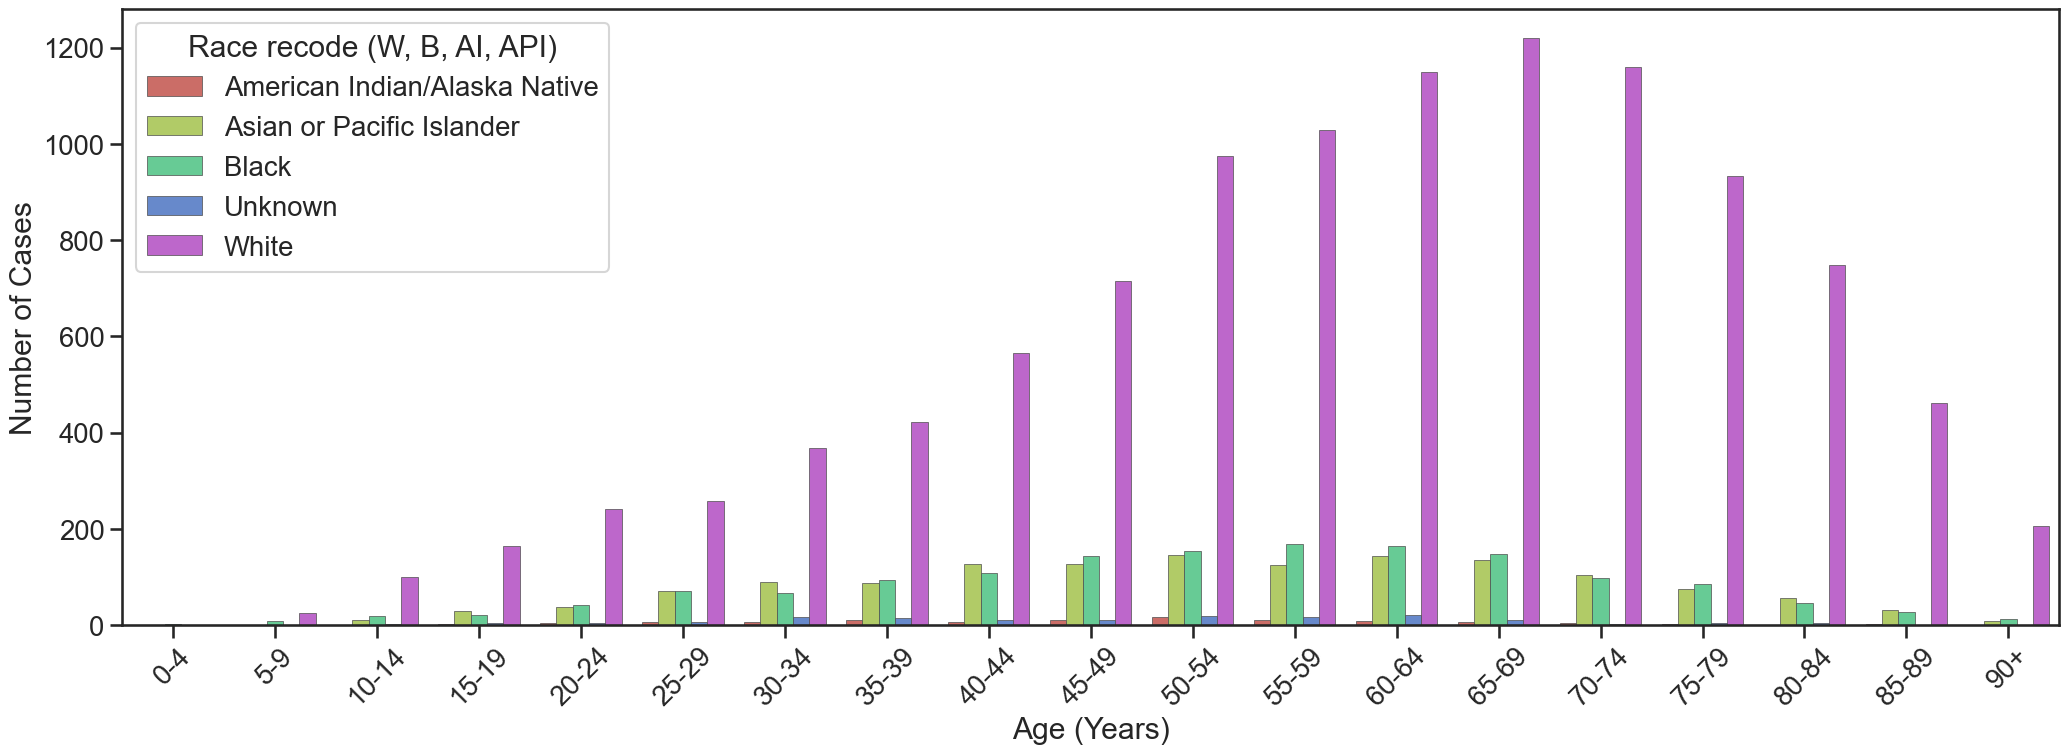

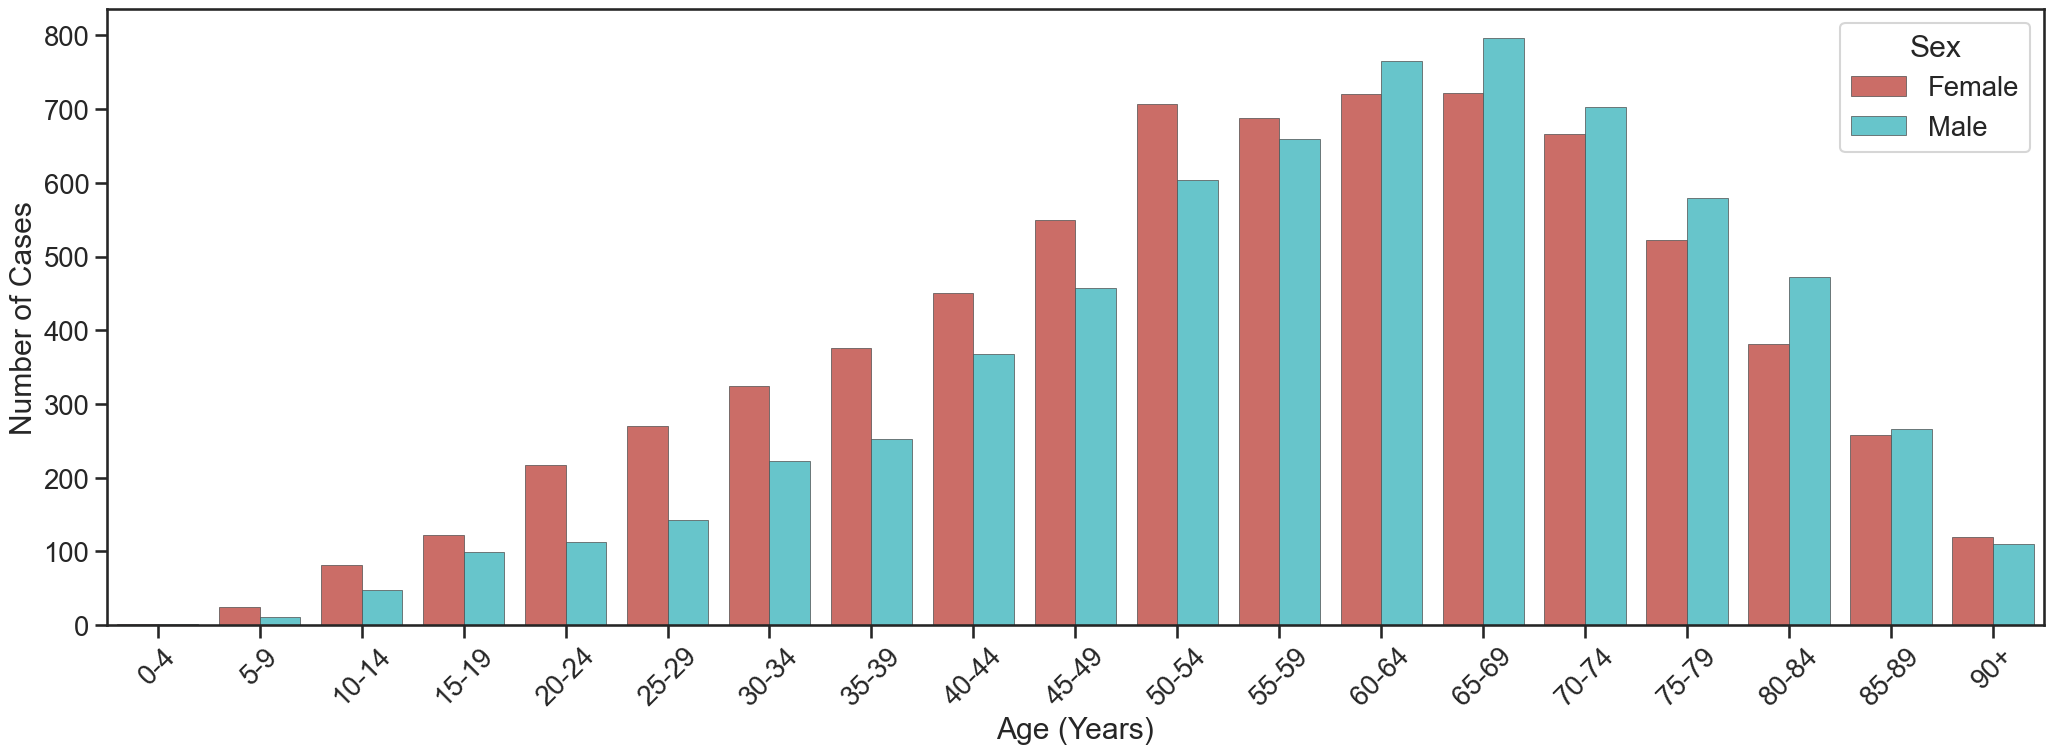

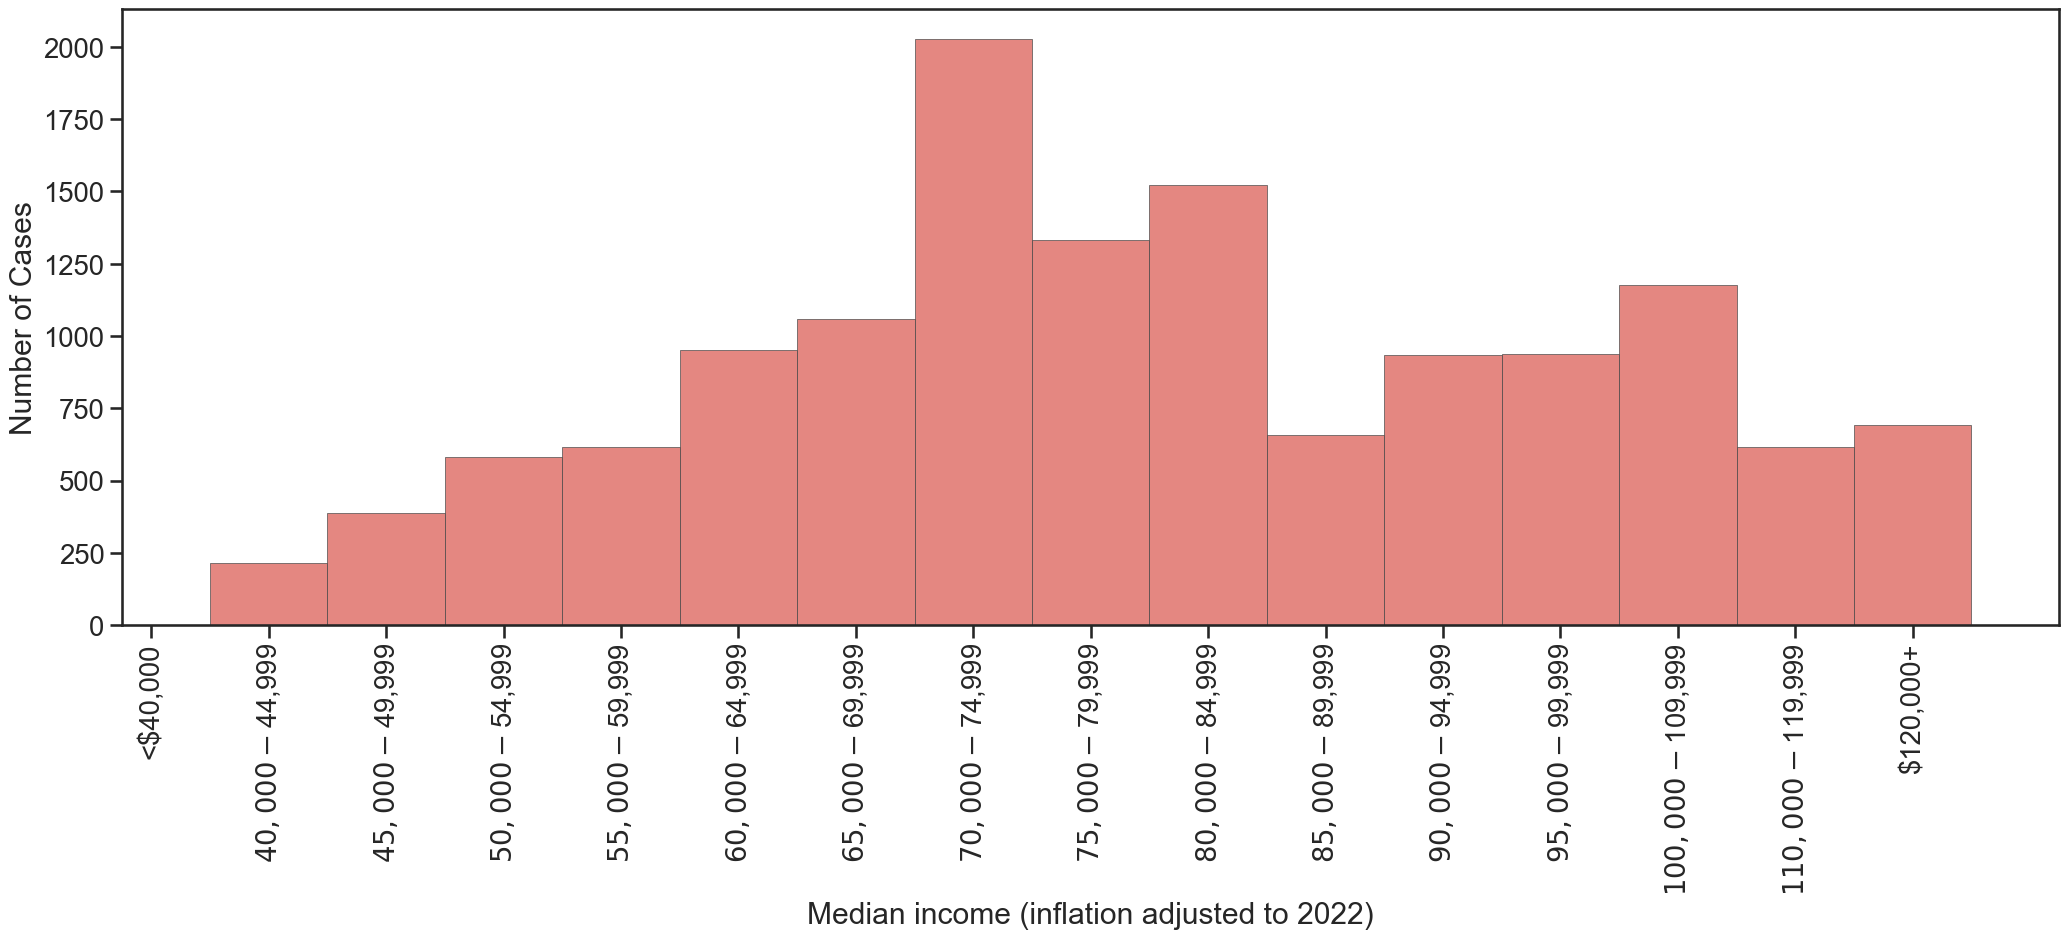

In [151]:


# Plot - countplot
sns.set_context('talk',font_scale=1.2)
sns.set_palette('hls')

# Race vs. Age
plt.figure(figsize=(25, 8))
racevage_histplot = sns.countplot(
    data=filtered_df,
    x=age_bin_colname,
    hue=race_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)
x_labels = racevage_histplot.get_xticklabels()

# Rotate x tick labels
racevage_histplot.set_xticklabels(x_labels, rotation=45)

racevage_histplot.set_xlabel('Age (Years)')
racevage_histplot.set_ylabel('Number of Cases')

# Sex vs. Age
plt.figure(figsize=(25, 8))
sexvage_countplot = sns.countplot(
    data=filtered_df,
    x=age_bin_colname,
    hue=sex_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)

# Rotate x tick labels
x_labels = sexvage_countplot.get_xticklabels()
sexvage_countplot.set_xticklabels(x_labels, rotation=45)
# sexvage_countplot.set_xticklabels(x_labels,rotation=90)
sexvage_countplot.set_xlabel('Age (Years)')
sexvage_countplot.set_ylabel('Number of Cases')

plt.figure(figsize=(25, 8))
ses_countplot = sns.histplot(
    data=filtered_df,
    x=ses_colname,
    palette='hls',
    linewidth=0.5,
    edgecolor=".3",
    log_scale=False
)

ses_countplot.set_xticklabels(ses_countplot.get_xticklabels(),rotation=90)
ses_countplot.set_xlabel('Median income (inflation adjusted to 2022)')
ses_countplot.set_ylabel('Number of Cases')


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/552800907.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = salivary_df.pivot_table(index=age_bin_colname, columns=ses_colname, aggfunc='size', fill_value=0)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, '0-4'),
  Text(0, 1.5, '5-9'),
  Text(0, 2.5, '10-14'),
  Text(0, 3.5, '15-19'),
  Text(0, 4.5, '20-24'),
  Text(0, 5.5, '25-29'),
  Text(0, 6.5, '30-34'),
  Text(0, 7.5, '35-39'),
  Text(0, 8.5, '40-44'),
  Text(0, 9.5, '45-49'),
  Text(0, 10.5, '50-54'),
  Text(0, 11.5, '55-59'),
  Text(0, 12.5, '60-64'),
  Text(0, 13.5, '65-69'),
  Text(0, 14.5, '70-74'),
  Text(0, 15.5, '75-79'),
  Text(0, 16.5, '80-84'),
  Text(0, 17.5, '85-89'),
  Text(0, 18.5, '90+')])

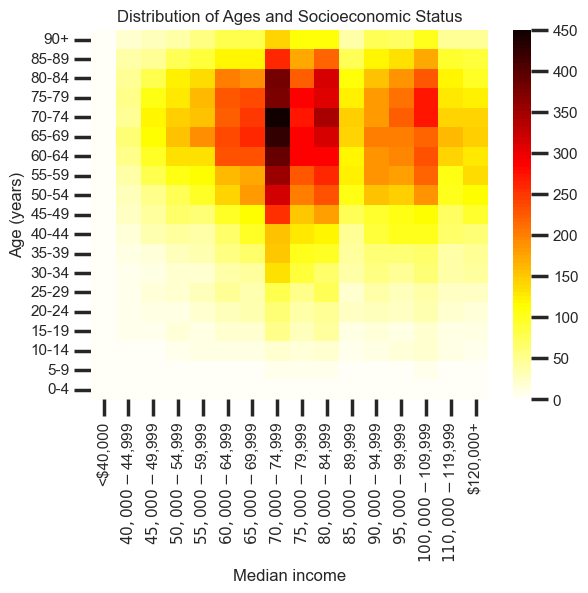

In [147]:
# Heatmap of age and socioeconomic
sns.set_context('poster',font_scale=.5)
# Create a pivot table that calculates the count of occurrences for each age and SES combination
# 
heatmap_data = filtered_df.pivot_table(index=age_bin_colname, columns=ses_colname, aggfunc='size', fill_value=0)

# Generate the RdYlGn palette with a specific number of colors
palette = sns.color_palette("hot_r",n_colors=100)
# Remove the darkest green, which is typically the last color in the RdYlGn palette
# You can adjust the indices depending on which colors you want to remove
# modified_palette = palette[:-1]  # This removes the last color

# Convert the modified list of colors to a colormap
cmap = sns.color_palette(palette, as_cmap=True)

# Create the heatmap
ses_heat = sns.heatmap(heatmap_data, cmap=cmap, annot=False, fmt='d')
ses_heat.invert_yaxis()
plt.title('Distribution of Ages and Socioeconomic Status')
plt.xlabel('Median income')
plt.ylabel('Age (years)')
# plt.show()
# Rotate the y-axis labels
plt.yticks(rotation=0)  # Rotate y-axis labels to be horizontal (90º from the default)
# plt.close()

Salivary Gland
Non-Hodgkin's - Extranodal


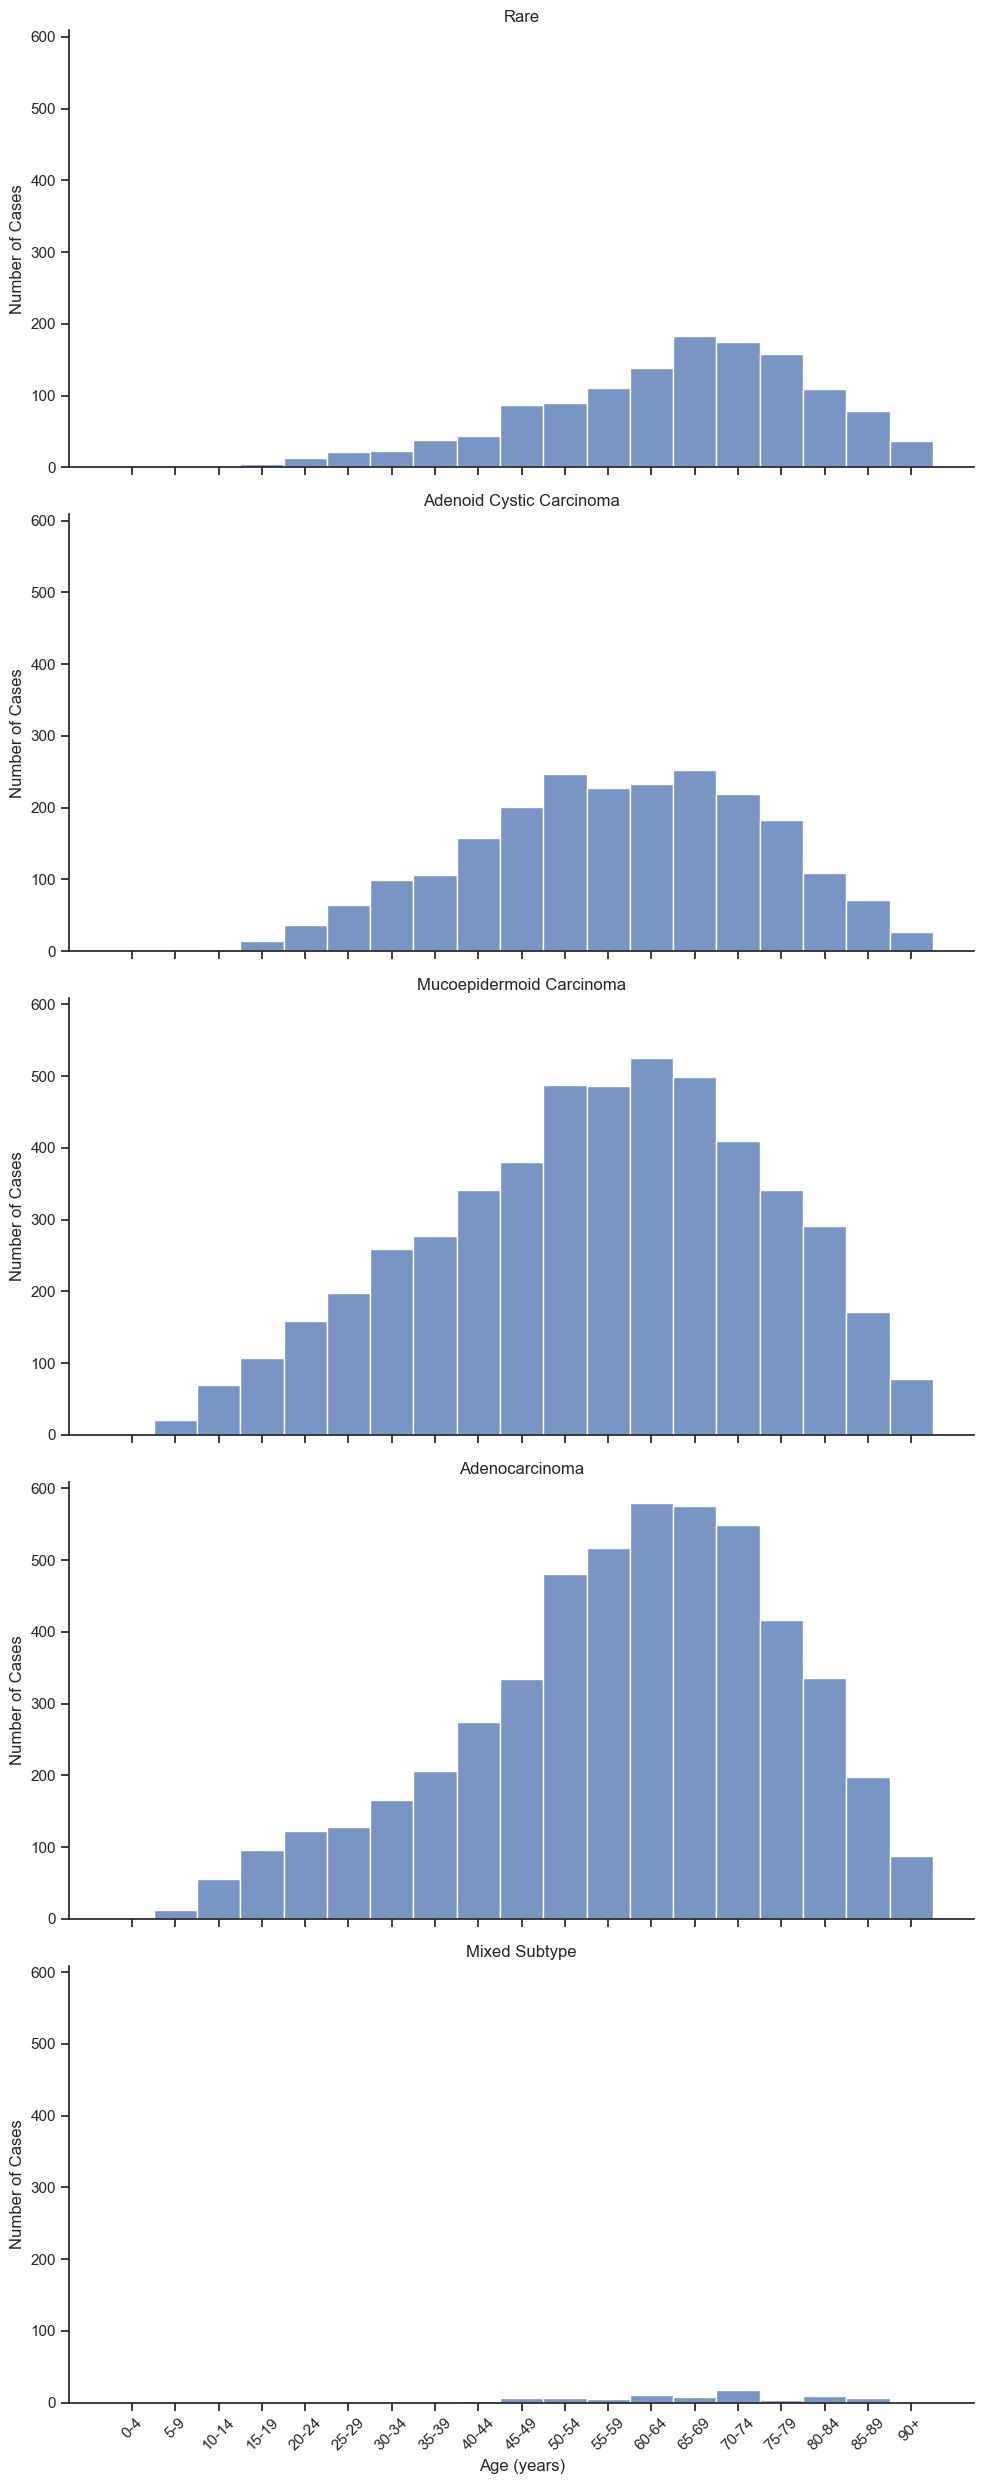

<Figure size 800x600 with 0 Axes>

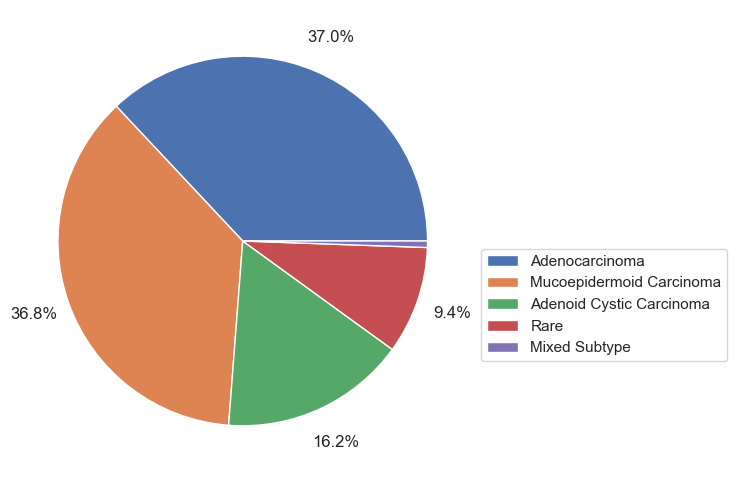

In [153]:
# Histological breakdown of tumor
sns.set_theme(style="ticks")
g = sns.displot(
    filtered_df, x=age_bin_colname, col="Histology", col_wrap=1,
    binwidth=1, height=5, facet_kws=dict(margin_titles=True),aspect=2, 
)
# Rotate the x-tick labels in each facet
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_xlabels('Age (years)')
g.set_ylabels('Number of Cases')
g.set_titles(col_template="{col_name}")  # Only display the unique values without the label

plt.tight_layout()
plt.show()

# Calculate tumor site counts
tumor_type_counts = filtered_df['Histology'].value_counts(normalize=True)
labels = tumor_type_counts.index
# Create pie chart
plt.figure(figsize=(8,6))
# Define a function as an input to autopct:
# Goal of function: 1) return "%1.1f%%" 
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct >= 1 else ''

# Create the pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    tumor_type_counts, labels=None, autopct=autopct_format,
    pctdistance=1.2  # Move the labels outside of the pie
)
# Add legend
plt.legend(patches, labels, loc='best', bbox_to_anchor=(1, 0.5))



      ICD-O-3 Code                 ICD-O-3 Hist/behav  \
0             8041  8041/3: Small cell carcinoma, NOS   
3             8200   8200/3: Adenoid cystic carcinoma   
5             8041  8041/3: Small cell carcinoma, NOS   
6             8430   8430/3: Mucoepidermoid carcinoma   
7             8430   8430/3: Mucoepidermoid carcinoma   
...            ...                                ...   
28014         8550      8550/3: Acinar cell carcinoma   
28015         8550      8550/3: Acinar cell carcinoma   
28020         8430   8430/3: Mucoepidermoid carcinoma   
28024         8430   8430/3: Mucoepidermoid carcinoma   
28025         8200   8200/3: Adenoid cystic carcinoma   

                      Histology  
0                          Rare  
3      Adenoid Cystic Carcinoma  
5                          Rare  
6      Mucoepidermoid Carcinoma  
7      Mucoepidermoid Carcinoma  
...                         ...  
28014            Adenocarcinoma  
28015            Adenocarcinoma  
28020  Mu

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/1972095948.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Histology'] = filtered_df['ICD-O-3 Code'].apply(categorize_histology)


In [156]:
# Select relevant columns for clinical characteristics analysis
clinical_columns = ['Primary Site - labeled', 'Histologic Type ICD-O-3',
                     'Grade Recode (thru 2017)', 'Derived Summary Grade 2018 (2018+)',
                     'Grade Clinical (2018+)', 'Grade Pathological (2018+)', 'Laterality',
                     'Diagnostic Confirmation', 'ICD-O-3 Hist/behav',
                     'ICD-O-3 Hist/behav, malignant','Histology','ICD-O-3 Code','SEER cause-specific death classification',
                    'SEER other cause of death classification', 'Survival months',
                    'Survival months flag', 'COD to site rec KM',
                    'COD to site recode ICD-O-3 2023 Revision',
                    'COD to site recode ICD-O-3 2023 Revision Expanded (1999+)',
                    'Vital status recode (study cutoff used)', 'Sequence number',
                    'First malignant primary indicator', 'Primary by international rules']

# Creating a summary for clinical characteristics
clinical_summary = filtered_df[clinical_columns]

# Display the summary
display(clinical_summary)

vital_percentages = clinical_summary["Vital status recode (study cutoff used)"].value_counts(normalize=True) * 100
alive_percentage = vital_percentages["Alive"]
dead_percentage = vital_percentages["Dead"]

print(vital_percentages)

,Primary Site - labeled,Histologic Type ICD-O-3,Grade Recode (thru 2017),Derived Summary Grade 2018 (2018+),Grade Clinical (2018+),Grade Pathological (2018+),Laterality,Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",...,SEER other cause of death classification,Survival months,Survival months flag,COD to site rec KM,COD to site recode ICD-O-3 2023 Revision,COD to site recode ICD-O-3 2023 Revision Expanded (1999+),Vital status recode (study cutoff used),Sequence number,First malignant primary indicator,Primary by international rules
0,C07.9-Parotid gland,8041,Poorly differentiated; Grade III,Blank(s),Blank(s),Blank(s),Right - origin of primary,Positive histology,"8041/3: Small cell carcinoma, NOS","8041/3: Small cell carcinoma, NOS",...,Dead (attributable to causes other than this c...,14.0,Complete dates are available and there are mor...,Myeloma,Plasma Cell Neoplasms and Immunoproliferative ...,Plasma Cell Neoplasms,Dead,3rd of 3 or more primaries,No,Yes
3,C07.9-Parotid gland,8200,Unknown,9,9,9,Right - origin of primary,Positive histology,8200/3: Adenoid cystic carcinoma,8200/3: Adenoid cystic carcinoma,...,Alive or dead due to cancer,NaN,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,4th of 4 or more primaries,No,Yes
5,C07.9-Parotid gland,8041,Undifferentiated; anaplastic; Grade IV,Blank(s),Blank(s),Blank(s),Right - origin of primary,Positive histology,"8041/3: Small cell carcinoma, NOS","8041/3: Small cell carcinoma, NOS",...,Dead (attributable to causes other than this c...,11.0,Complete dates are available and there are mor...,Cerebrovascular Diseases,Cerebrovascular diseases,Cerebrovascular diseases,Dead,3rd of 3 or more primaries,No,Yes
6,C07.9-Parotid gland,8430,Well differentiated; Grade I,Blank(s),Blank(s),Blank(s),Right - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,210.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,2nd of 2 or more primaries,No,Yes
7,C07.9-Parotid gland,8430,Unknown,A,A,A,Left - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,NaN,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,2nd of 2 or more primaries,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28014,C07.9-Parotid gland,8550,Unknown,9,9,9,Right - origin of primary,Positive histology,8550/3: Acinar cell carcinoma,8550/3: Acinar cell carcinoma,...,Alive or dead due to cancer,9.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,One primary only,Yes,Yes
28015,C07.9-Parotid gland,8550,Unknown,C,C,C,Left - origin of primary,Positive histology,8550/3: Acinar cell carcinoma,8550/3: Acinar cell carcinoma,...,Alive or dead due to cancer,11.0,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,2nd of 2 or more primaries,No,Yes
28020,C07.9-Parotid gland,8430,Unknown,9,9,9,Right - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,NaN,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,One primary only,Yes,Yes
28024,C08.0-Submandibular gland,8430,Unknown,B,B,B,Right - origin of primary,Positive histology,8430/3: Mucoepidermoid carcinoma,8430/3: Mucoepidermoid carcinoma,...,Alive or dead due to cancer,NaN,Complete dates are available and there are mor...,Alive,Alive,Alive,Alive,One primary only,Yes,Yes


Vital status recode (study cutoff used)
Alive    64.362431
Dead     35.637569
Name: proportion, dtype: float64


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/3480974227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Survival months'] = filtered_df['Survival months'].replace("Unknown", np.nan)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/3480974227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Survival months'] = pd.to_numeric(filtered_df['Survival months'])
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_76938/3480974227.py:6: Sett

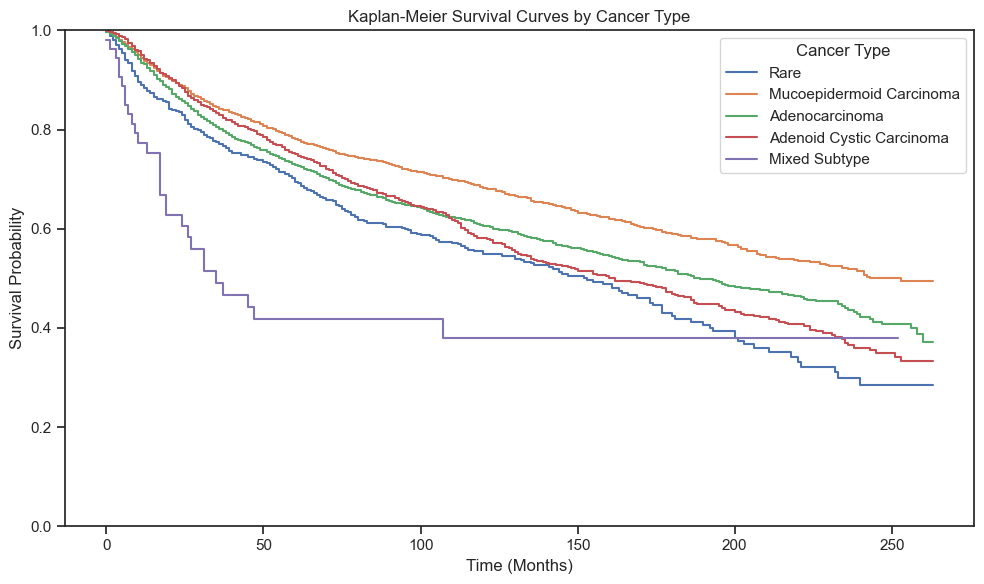

In [157]:
# Replace "Unknown" with nan's 
filtered_df['Survival months'] = filtered_df['Survival months'].replace("Unknown", np.nan)
# Change to numeric
filtered_df['Survival months'] = pd.to_numeric(filtered_df['Survival months'])

filtered_df['event_occurred'] = filtered_df['Vital status recode (study cutoff used)'].apply(
    lambda x: 1 if x == 'Dead'
# else 2 if x == 'Dead (missing/unknown COD)'
else 0)

df = filtered_df.dropna()
# Initialize the Kaplan-Meier fitter
# Define the unique cancer types in your dataset
cancer_types = df['Histology'].unique()

# Create the plot
plt.figure(figsize=(10, 6))

# Loop over each cancer type to plot Kaplan-Meier curves
for cancer_type in cancer_types:
    # Filter the DataFrame for each cancer type
    df_cancer = df[df['Histology'] == cancer_type]

    # Fit the Kaplan-Meier model
    kmf.fit(durations=df_cancer['Survival months'], event_observed=df_cancer['event_occurred'], label=cancer_type)

    # Plot the survival function for this cancer type
    kmf.plot_survival_function(ci_show=False)

# Customize the plot
plt.title('Kaplan-Meier Survival Curves by Cancer Type')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.ylim(0,1)
plt.legend(title='Cancer Type')
plt.tight_layout()

# Show the plot
plt.show()